Title of Notebook: Exercise 1.5_Task_Supervised Machine Learning Algorithms Part 2

Content:
1. Loading of libraries and Creation of Path
2. Importation of Datasets and Preprocessing
3. Decision Tree Classification on Dataest
4. Artificial Neural Networks Classification on Dataset

1. Loading Liraries and Creating Path

In [75]:
# Import Librariea and Create Path Directory

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

In [76]:
# Create Path Directory

path = r'c:\Users\HP\Documents\Data Career Development\Data Analytics Course at Careerfoundary Bootcamp, Berlin\Data Analytics Specialization_Ach. 7 & 8\08.04.2025 Machine Learning with Python'

In [77]:
path

'c:\\Users\\HP\\Documents\\Data Career Development\\Data Analytics Course at Careerfoundary Bootcamp, Berlin\\Data Analytics Specialization_Ach. 7 & 8\\08.04.2025 Machine Learning with Python'

2. Importation of Datasets and Preprocessing

In [79]:
# import weather stations dataset

df_weather = pd.read_csv(os.path.join(path,'02 Data Sets','Manipulated Data','Dataset_wepredict_processed_scaled.csv'), index_col = False)

In [80]:
df_weather.head()

,Unnamed: 0,DATE,id,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.731975,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.731824,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.731673,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.731523,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.731372,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [81]:
#drop unrequired columns
df_weather.drop(['Unnamed: 0','DATE','id','MONTH','GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation',
                              'GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover',
                              'ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed',
                              'TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean',
                              'TOURS_temp_min','TOURS_temp_max'], axis = 1, inplace = True) 


In [82]:
df_weather.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


Note:
1. Dataset was confirmed as having no missing values and duplicates from previous Exercise
2. Data has been scaled to avoid situation of large values dominating the algorithms convergence precedure

In [84]:
# import the target variable dataset, "answers"
df_answers = pd.read_csv(os.path.join(path,'02 Data Sets','Raw Data','Dataset-Answers.csv'), index_col = False) 

In [85]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# drop the DATE column from the 'answers' dataframe

df_answers = df_answers.drop('DATE', axis=1)

In [87]:
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Note:
1. Dataset 'answers' was confirmed to have no missing values and duplicates from previous Exercise
2. Datapoints are suitably coded in binary for the required purpose
3. However, the coding for the Sonnblick weather station is incomplete

3. Decision Tree Classification on the Weather Dataset

In [90]:
#define X and y datasets

X = df_weather
y = df_answers

In [91]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [92]:
#Split datasets (X or feature set) and (y or target variable set) into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


[Text(0.4405405792124542, 0.9761904761904762, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.15178571428571427, 0.9285714285714286, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.2961631467490842, 0.9523809523809523, 'True  '),
 Text(0.06501831501831502, 0.8809523809523809, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0

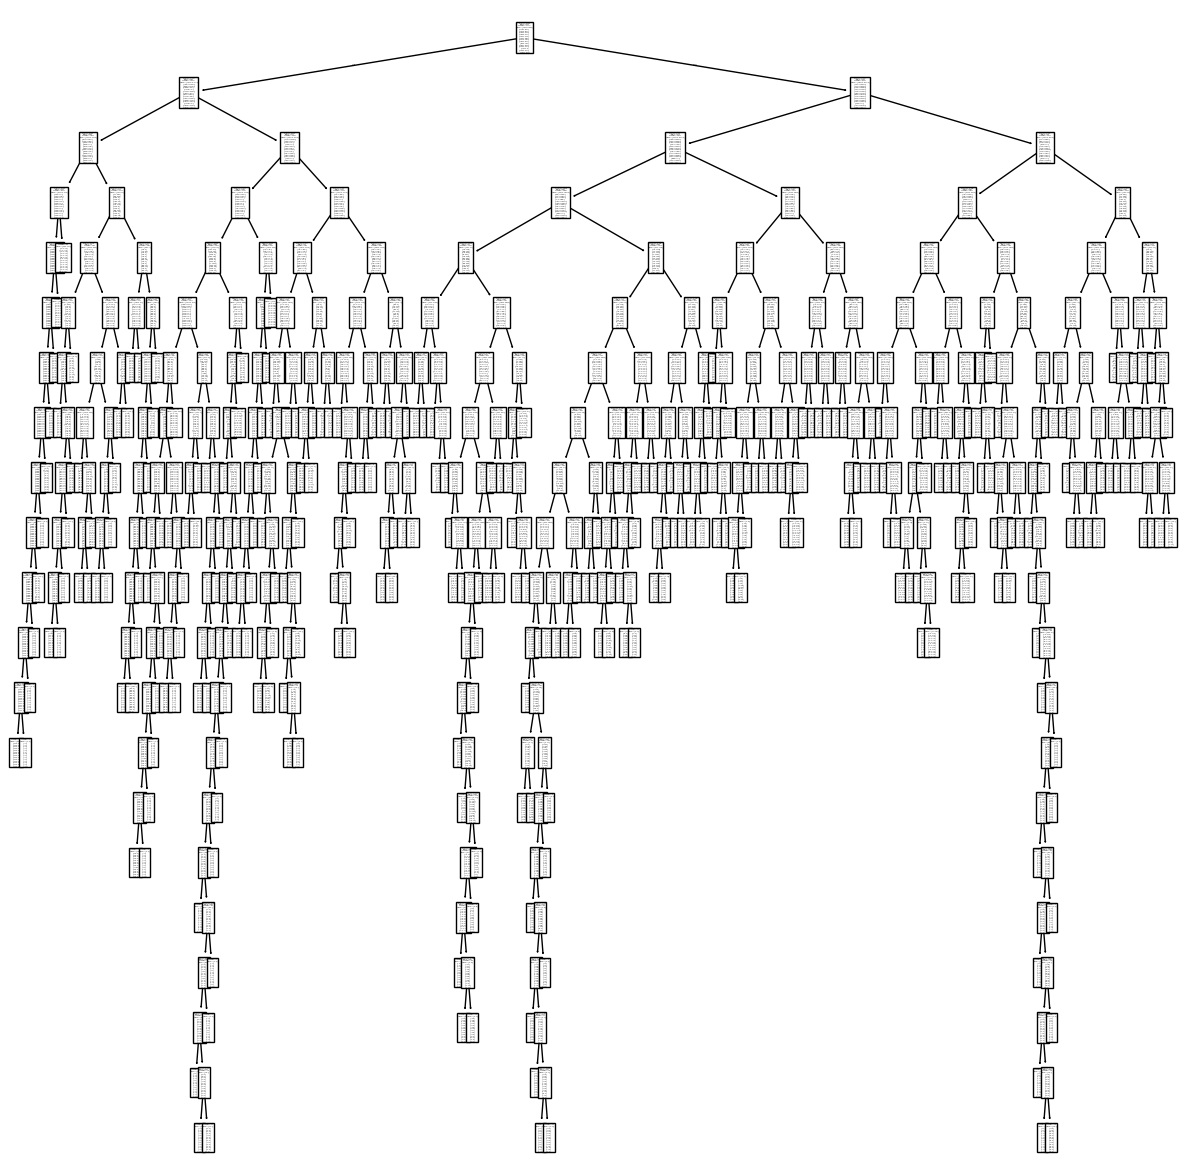

In [94]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=75)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [95]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.5917378299266689


Note:
1. I used a combination of percentage-based method and crosss validation score to tune the min_samples_split value
2. Between several values- 2, 5, 8, 10, 11, 15, 18, 20, 22, 25, 50, 75 and 226 - I eventually used 75
3. The classifications obtained are, however,not readable as they are way too many to display legibly on this laptop
4. min_sampls_split value of 75 generated a training accuracy of 59.2%
5. I think the decision tree requires pruning due to the illegible branches and leaf nodes generated, but the large samples split value should remove the likelihood of overfitting.

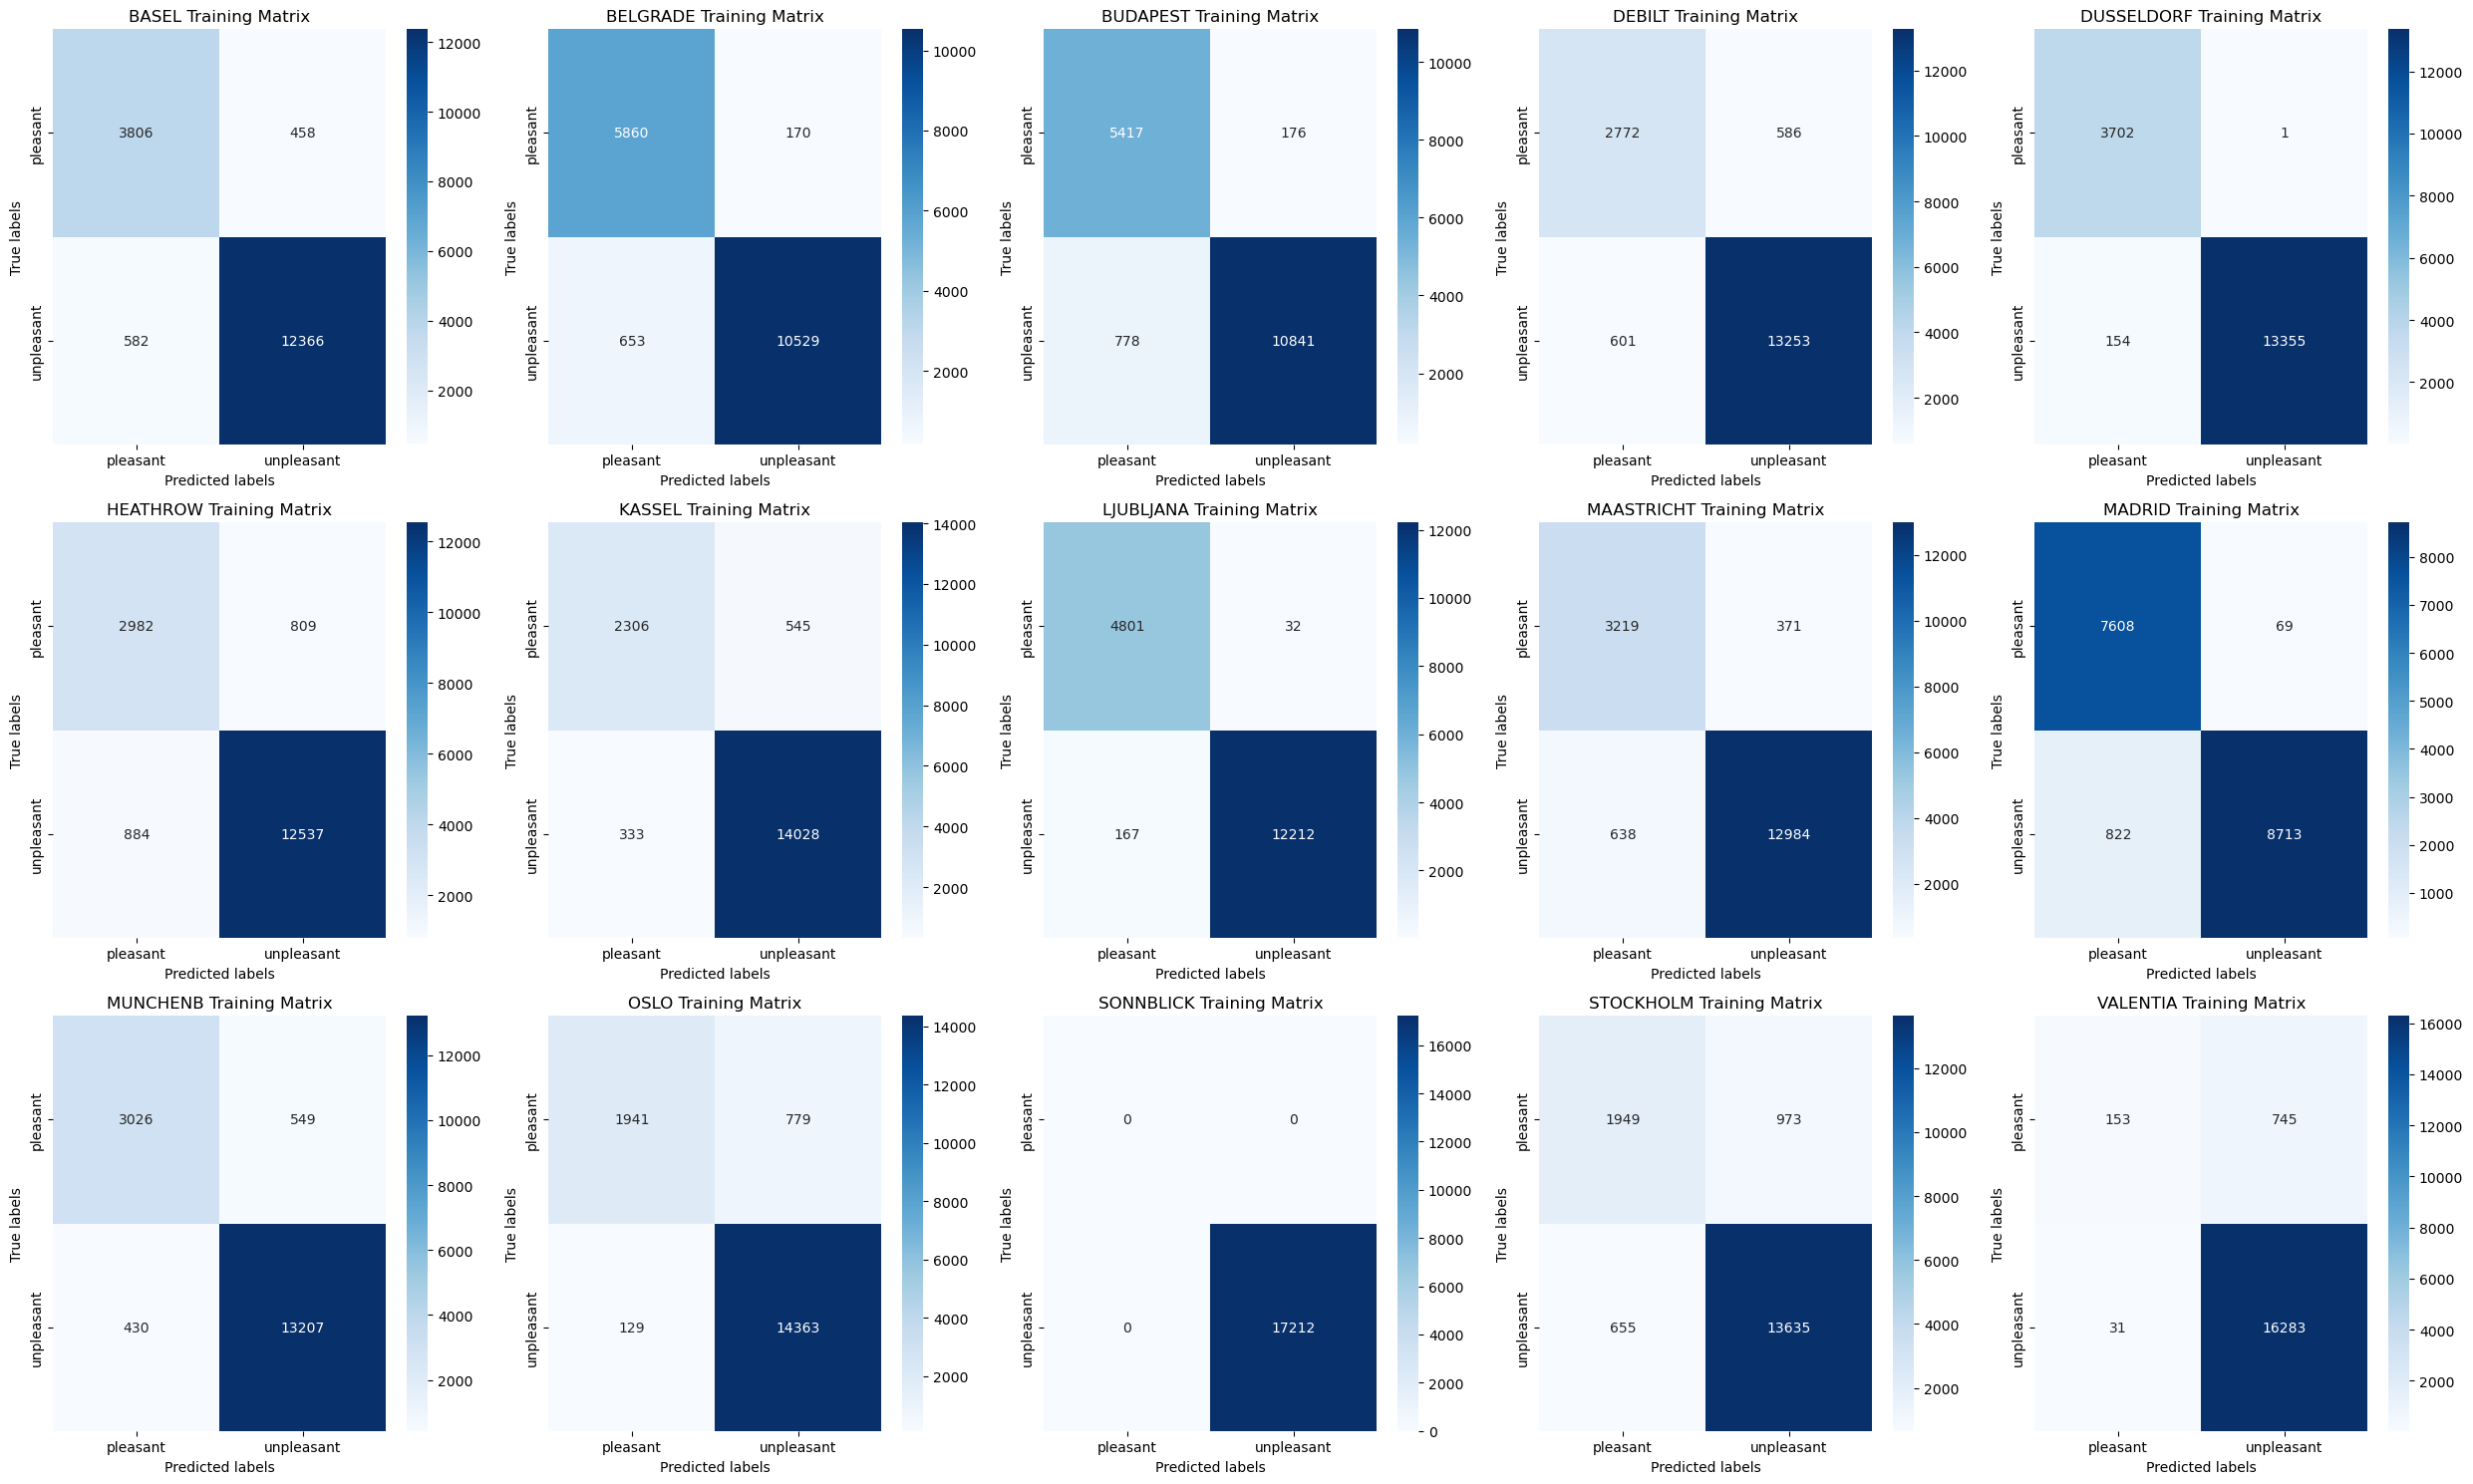

In [97]:
# Generate predictions for both training and testing sets
y_train_pred = weather_dt.predict(X_train)
y_test_pred = weather_dt.predict(X_test)

# Plot confusion matrices for training set
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_train.loc[:, name + key], y_train_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Training Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()


In [98]:
#What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.6188567445102823


array([[[4093,  245],
        [ 172, 1228]],

       [[3543,  233],
        [  60, 1902]],

       [[3644,  256],
        [  64, 1774]],

       [[4408,  229],
        [ 203,  898]],

       [[4469,   38],
        [   0, 1231]],

       [[4236,  334],
        [ 288,  880]],

       [[4712,  103],
        [ 185,  738]],

       [[4126,   69],
        [  10, 1533]],

       [[4319,  243],
        [ 133, 1043]],

       [[2892,  276],
        [  33, 2537]],

       [[4399,  147],
        [ 185, 1007]],

       [[4829,   50],
        [ 280,  579]],

       [[5738,    0],
        [   0,    0]],

       [[4517,  249],
        [ 394,  578]],

       [[5447,   15],
        [ 241,   35]]], dtype=int64)

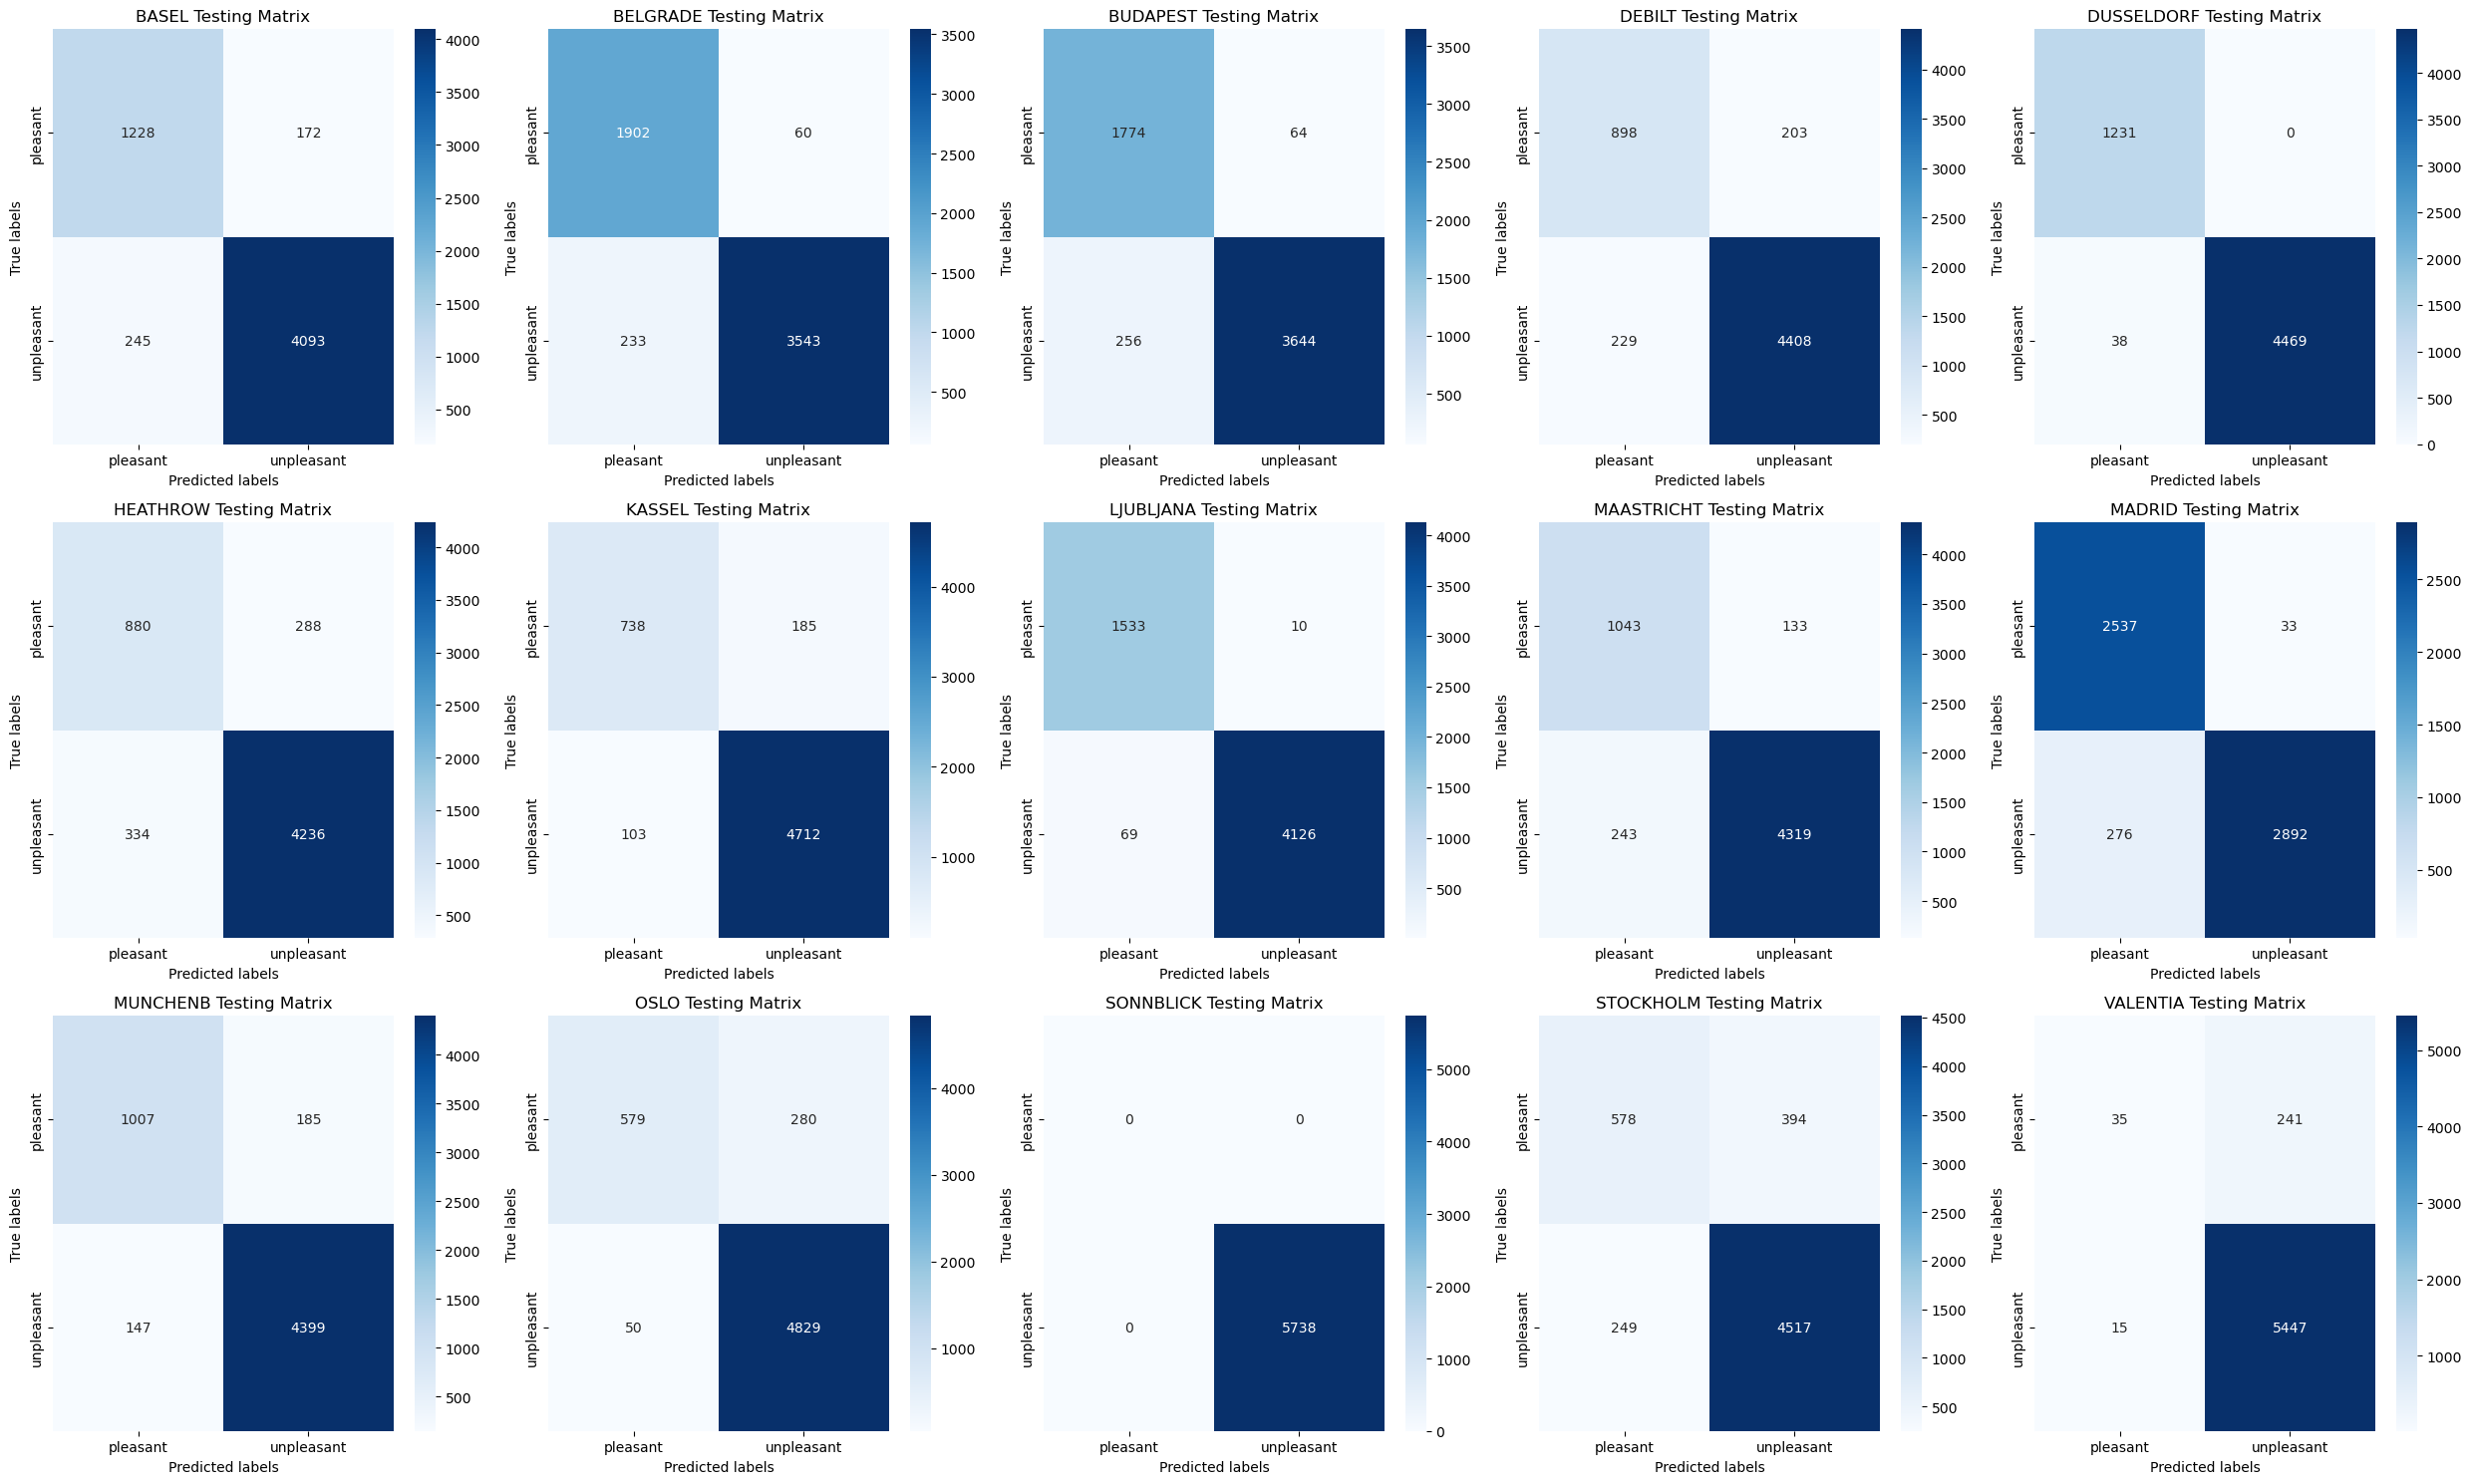

In [99]:
# Plot confusion matrices for testing set
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_test_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Testing Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()

4. Artificial Nueral Network (ANN) Classifications on Dataset

In [101]:
# import unscaled weather dataset to test its effect on ANN accuracy

df_WNS = pd.read_csv(os.path.join(path,'02 Data Sets','Raw Data','Dataset-wepredict-processed.csv'), index_col=False)

In [102]:
df_WNS.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [103]:
#drop unrequired columns
df_WNS.drop(['DATE','MONTH','GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation',
                              'GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover',
                              'ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed',
                              'TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean',
                              'TOURS_temp_min','TOURS_temp_max'], axis = 1, inplace = True) 


In [104]:
df_WNS.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [105]:
#import the 'answer' dataset as 'Ans' dataframe

df_Ans = pd.read_csv(os.path.join(path,'02 Data Sets','Raw Data','Dataset-Answers.csv'), index_col=False)

In [106]:
df_Ans.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
# drop the DATE column from the 'answers' dataframe

df_Ans = df_Ans.drop('DATE', axis =1)

In [108]:
df_Ans.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [138]:
#create the X and y matrices

X = df_WNS
y = df_Ans

In [140]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [142]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [146]:
#check how the unscaled X_train set looks
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


In [148]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


Notes: Comparing How Scaled and Unscaled Dataset Affect Algorithm Accuracy
1. Because the variables/features in the dataset have different units of measure, the values are quite different in magnitude as they measure different features (e.g., cloud cover values are several folds larger than precipitation or humidity, etc.)
2. Such large values will dominate the data landscape and lead to a bias model in training the algorithm
3. Scaling put all values within 1 and -1 range, makes the mean and STDDEV of each variable to be 0 and 1 respectively, and ensure the algorithm action is not biased in classification
4. It would be unwieldy to plot 147 variables here to compare the scaling effect graphically

In [158]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. Scenario 1 (10, 10) is two hidden layers with 10 nodes each,
#and below max_iterations and tolerance.
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)

In [160]:
#check prediction accuracies for scenario 1

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.49395770392749244
0.49878006273963055


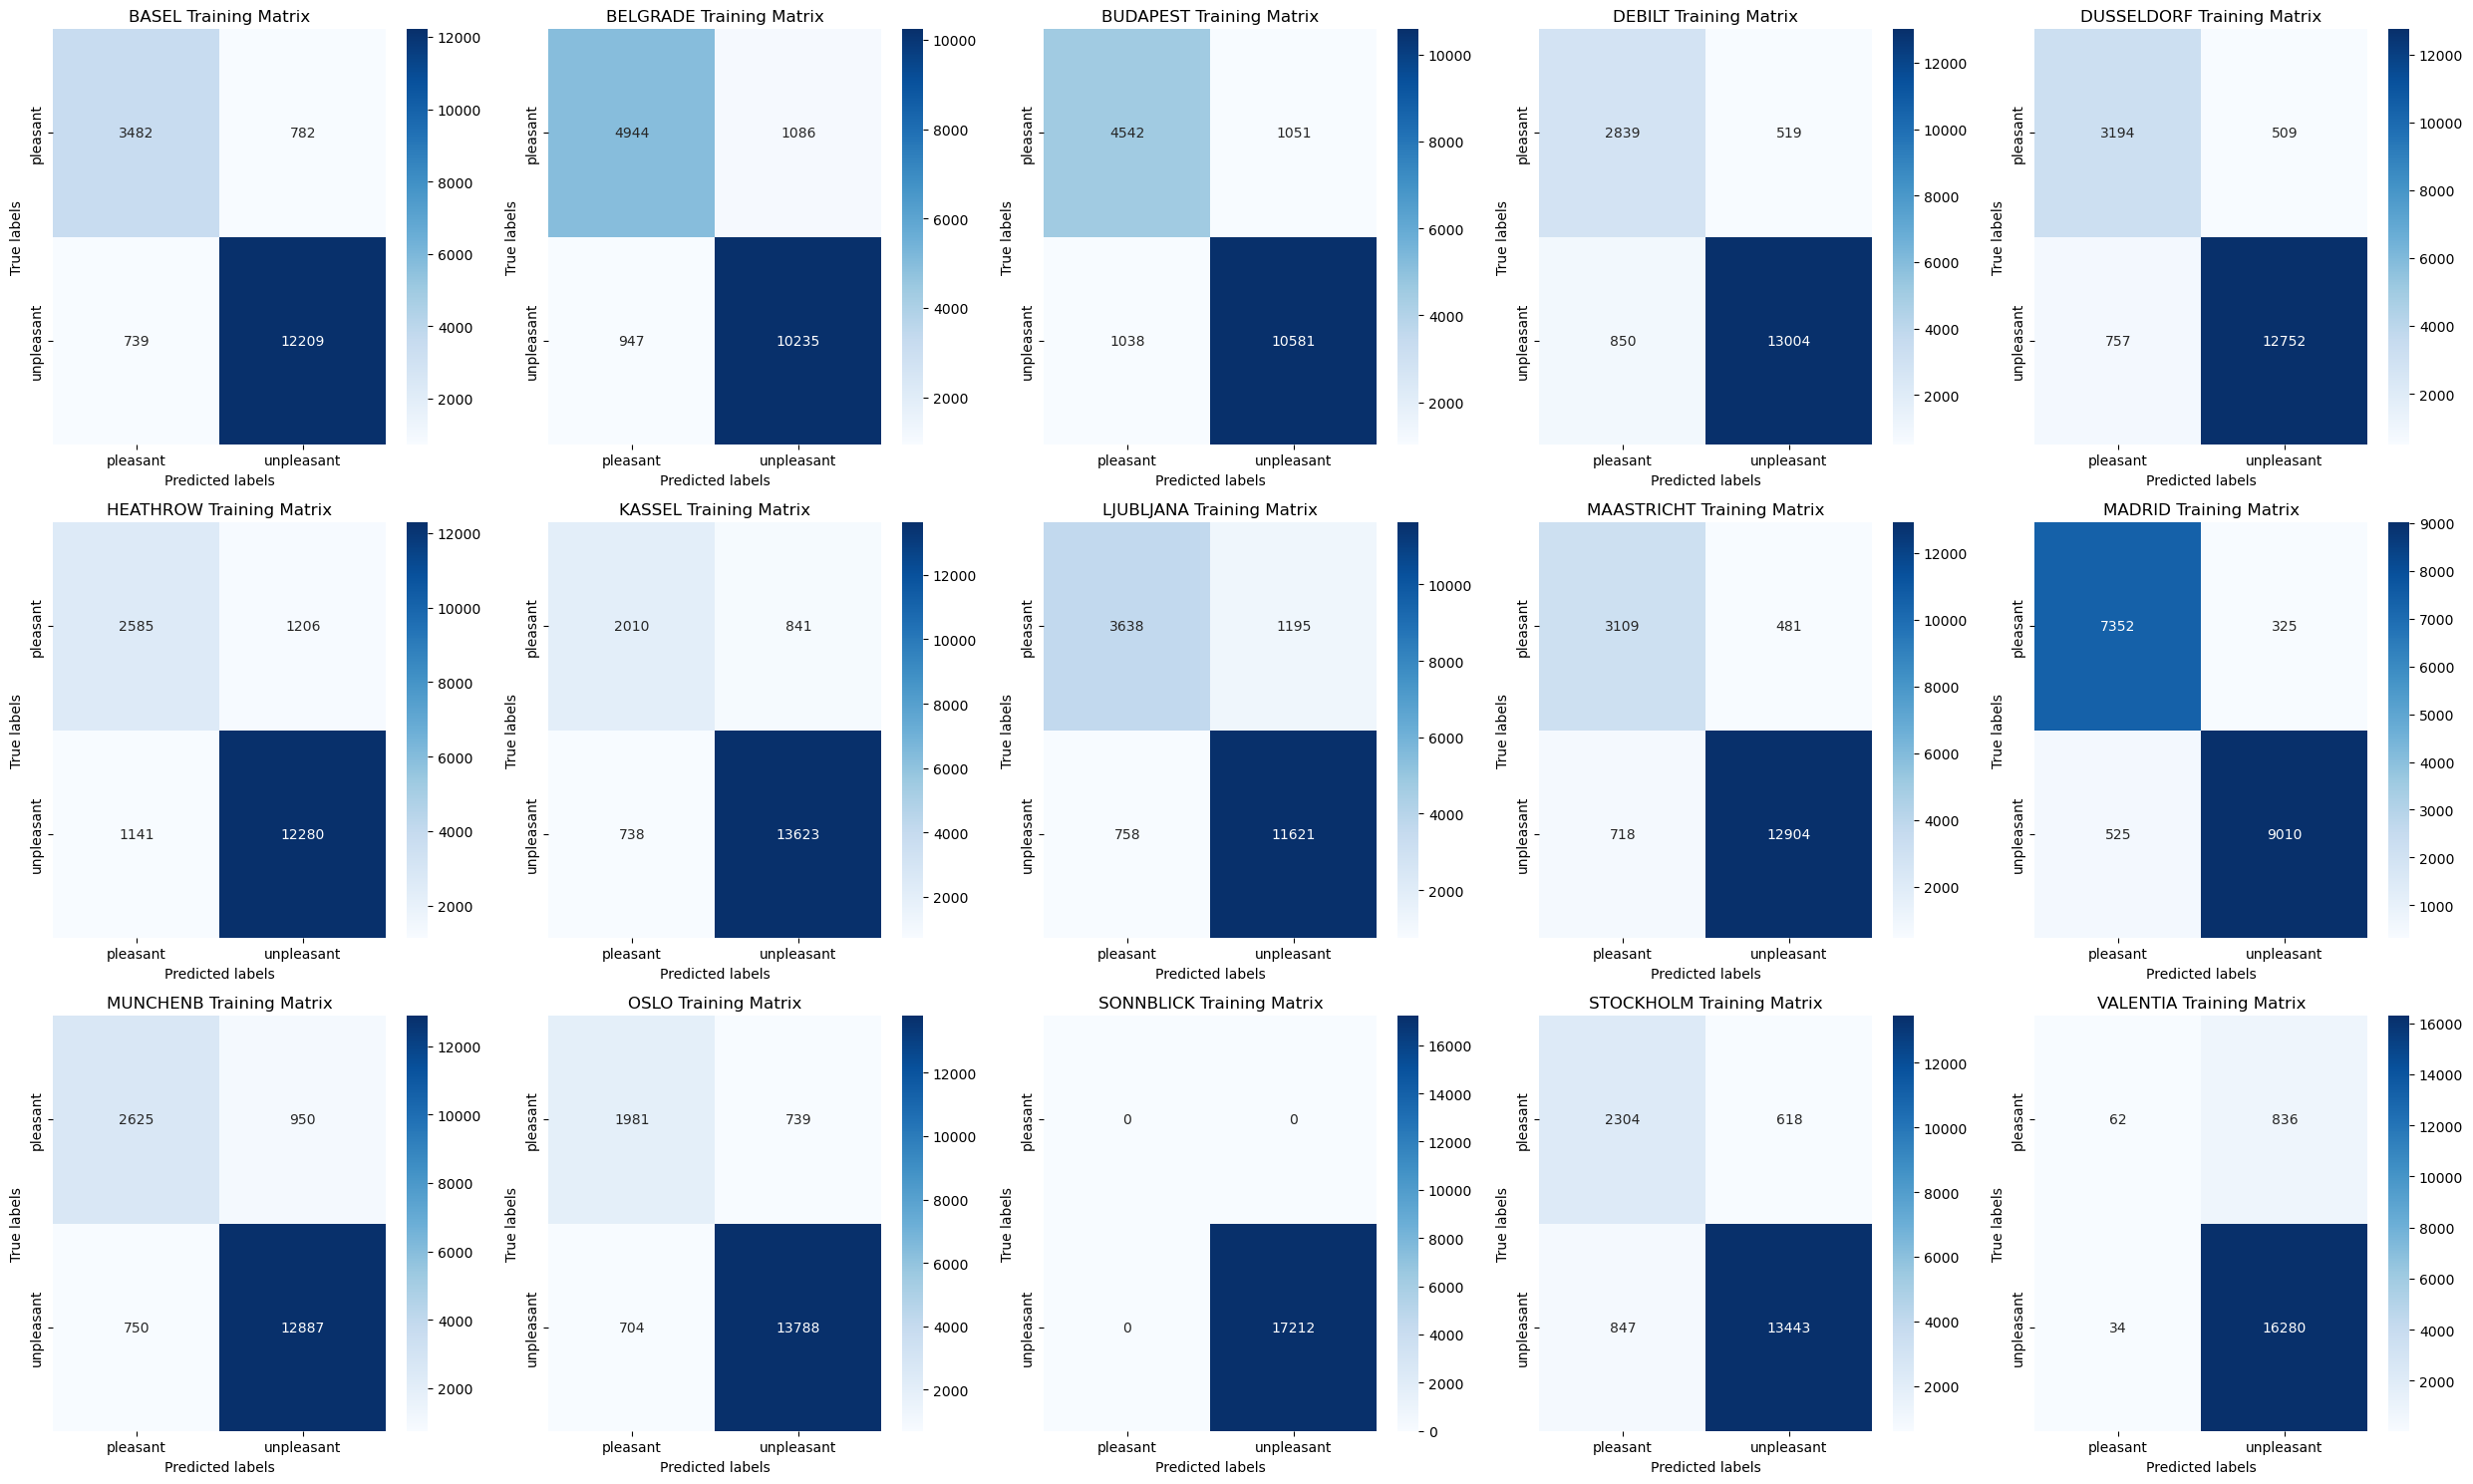

In [164]:
# Generate predictions for both training and testing sets
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot confusion matrices for training set
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_train.loc[:, name + key], y_train_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Training Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()


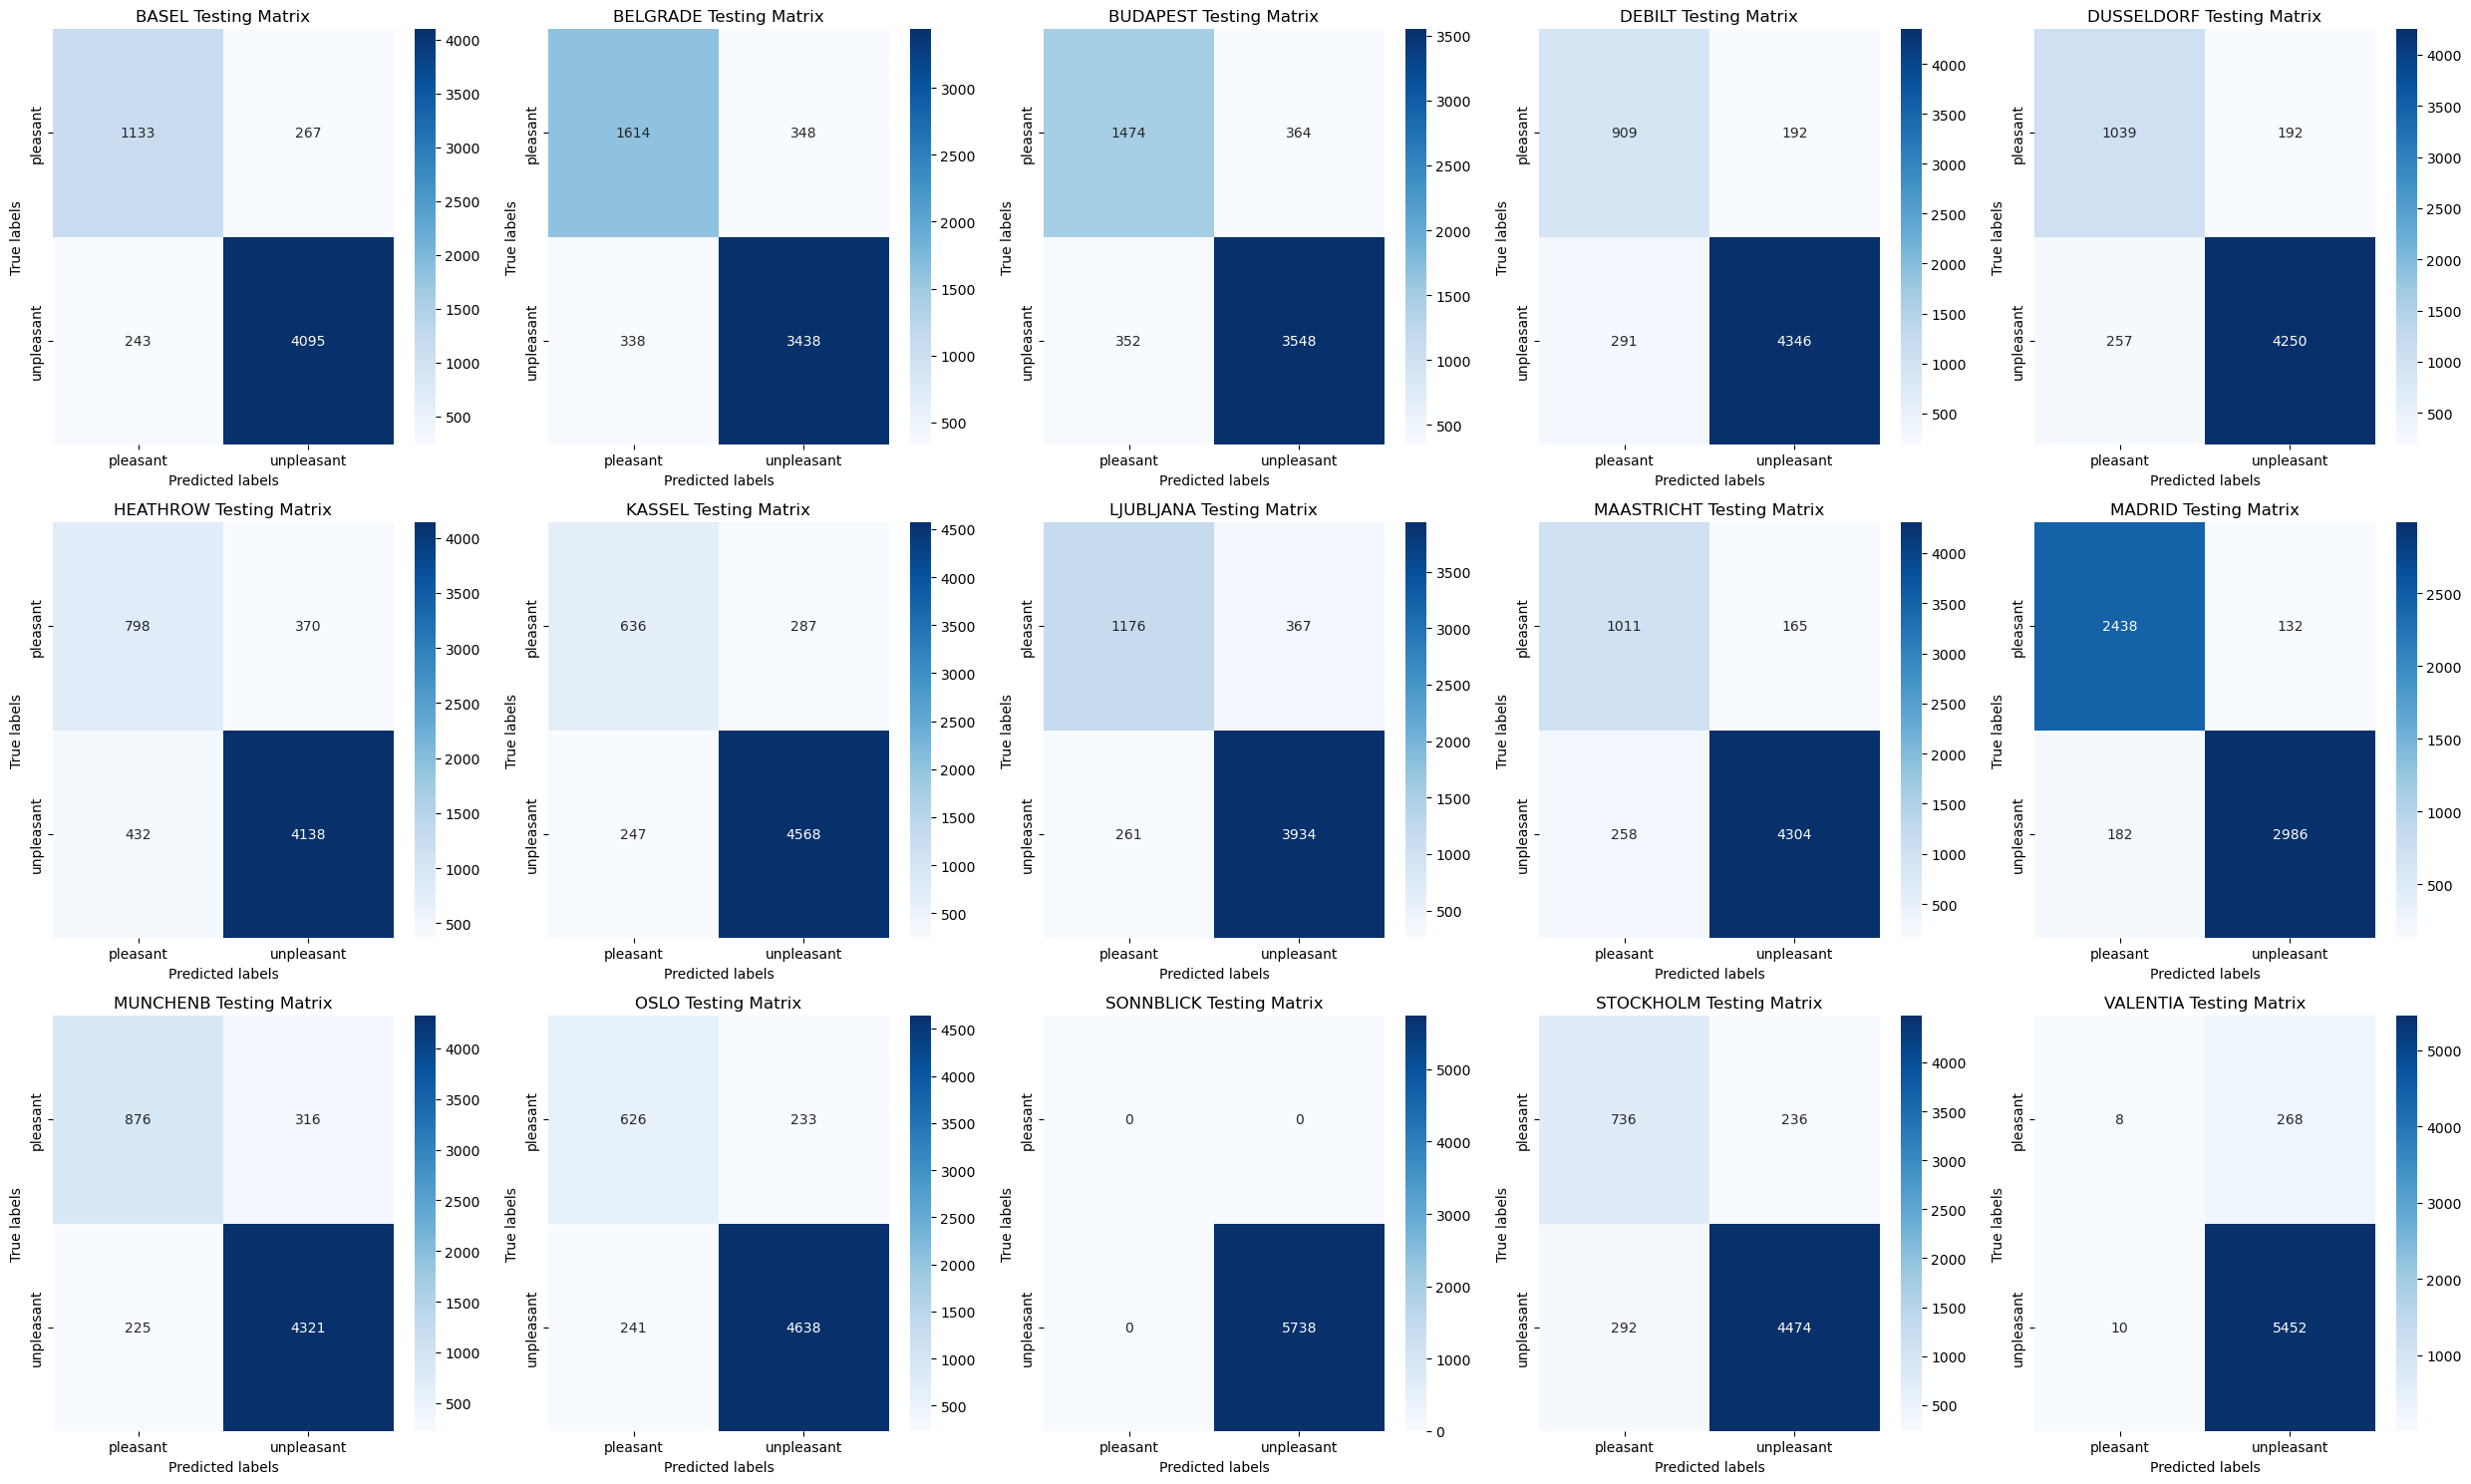

In [166]:
# Plot confusion matrices for testing set
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_test_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Testing Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()

In [168]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. Scenario 2 (20, 20) is two hidden layers with 20 nodes each,
#and below max_iterations and tolerance.
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=400, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=400)

In [170]:
#check prediction accuracies for scenario 2

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.572623750871485
0.5571627744858836


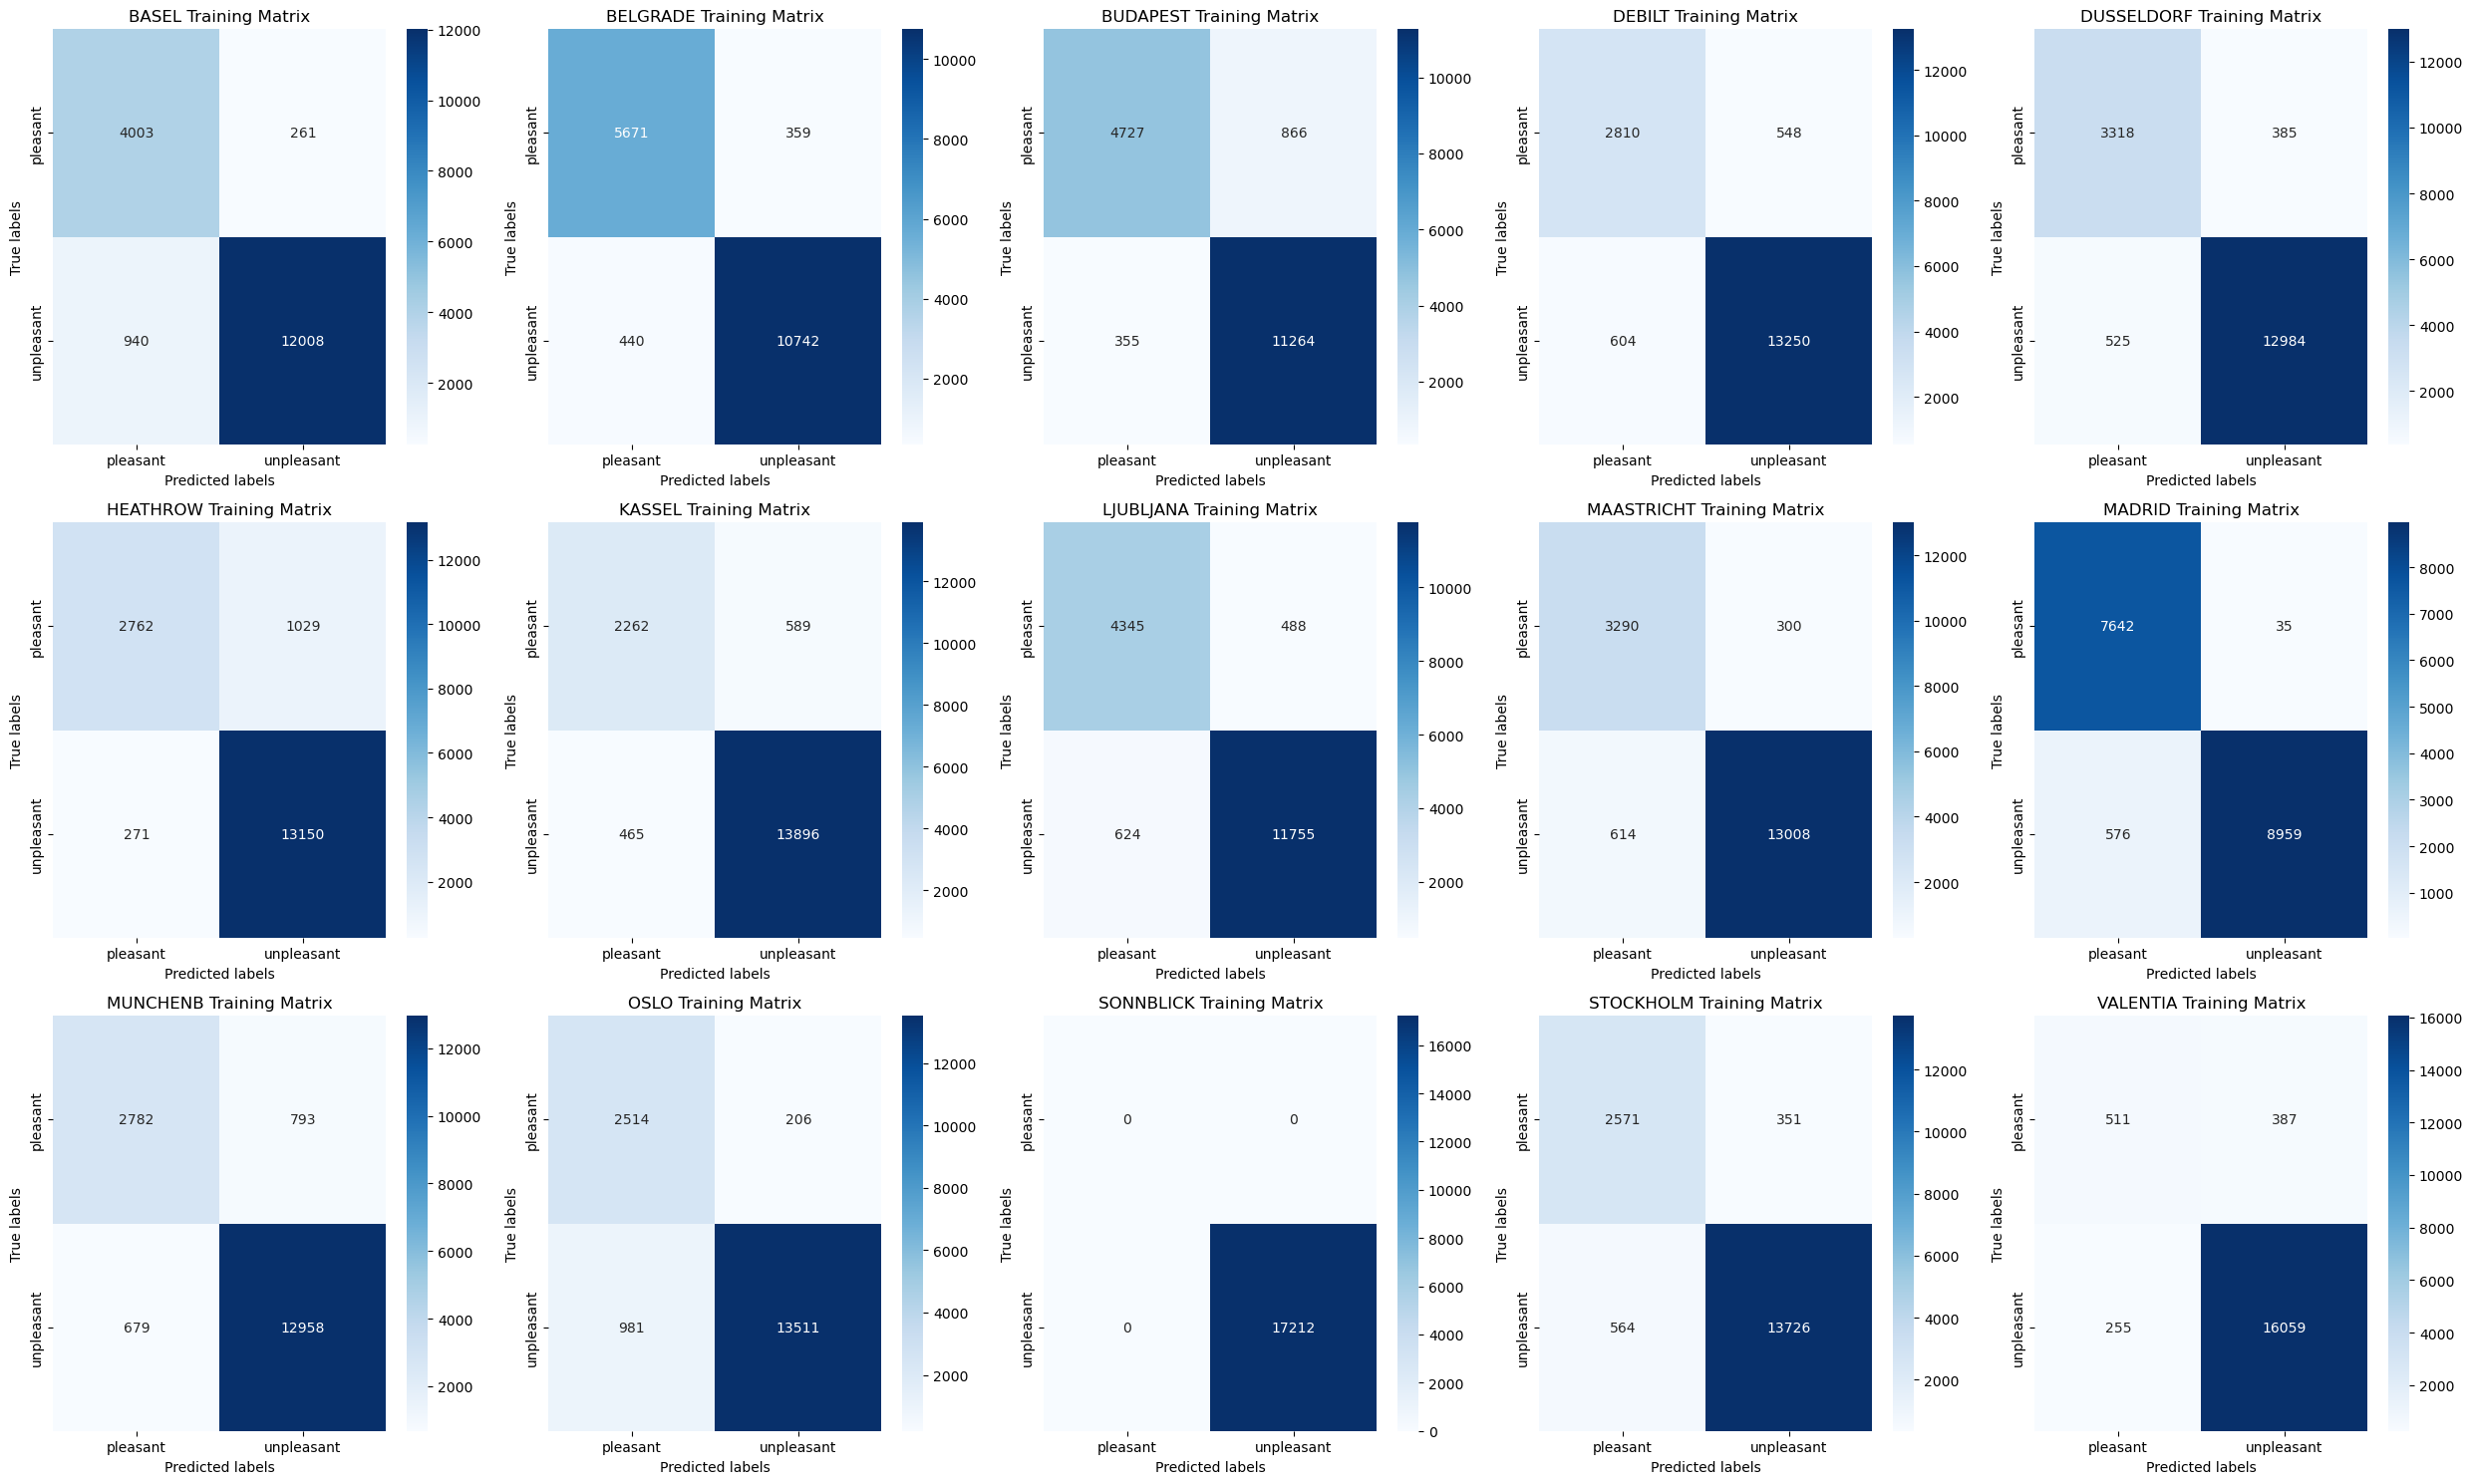

In [172]:
# Generate predictions for both training and testing sets
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot confusion matrices for training set
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_train.loc[:, name + key], y_train_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Training Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()


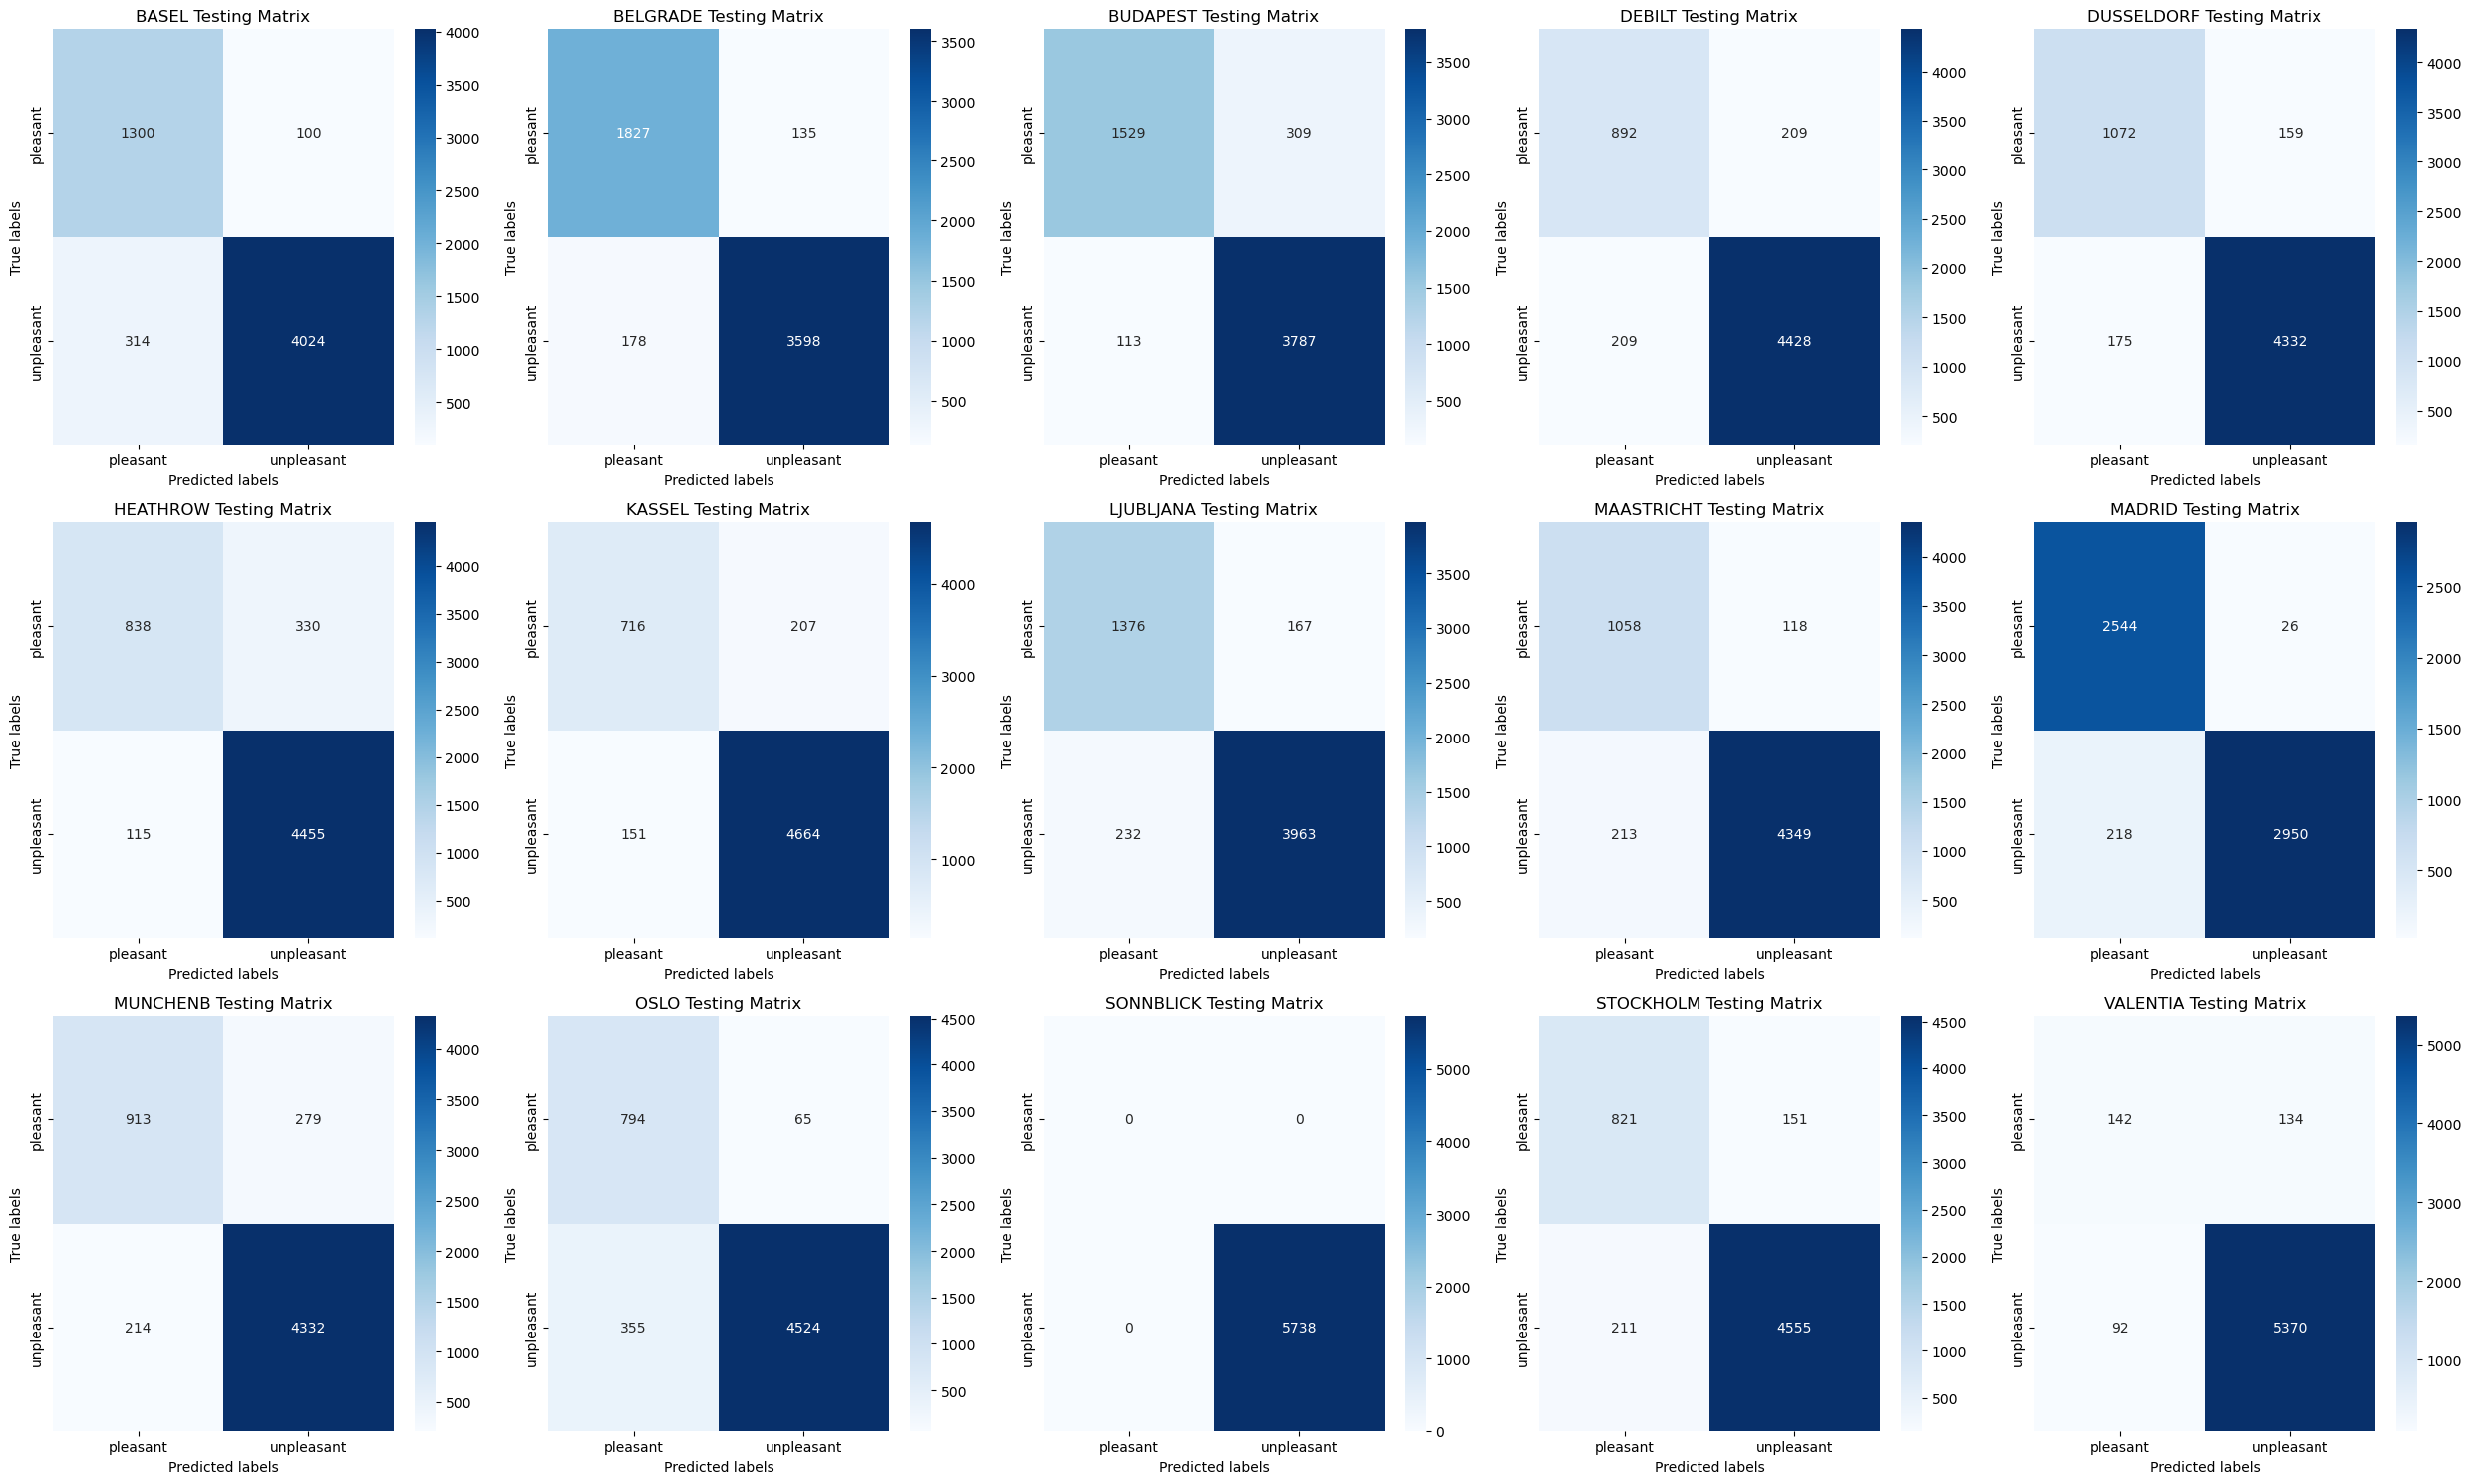

In [174]:
# Plot confusion matrices for testing set
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_test_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Testing Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()

In [176]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. Scenario 3 (1000, 50, 25) is three hidden layers with those nodes each,
#and below max_iterations and tolerance.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=350, tol=0.0002)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=350, tol=0.0002)

In [178]:
#check prediction accuracies for scenario 2

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6665117359981408
0.5827814569536424


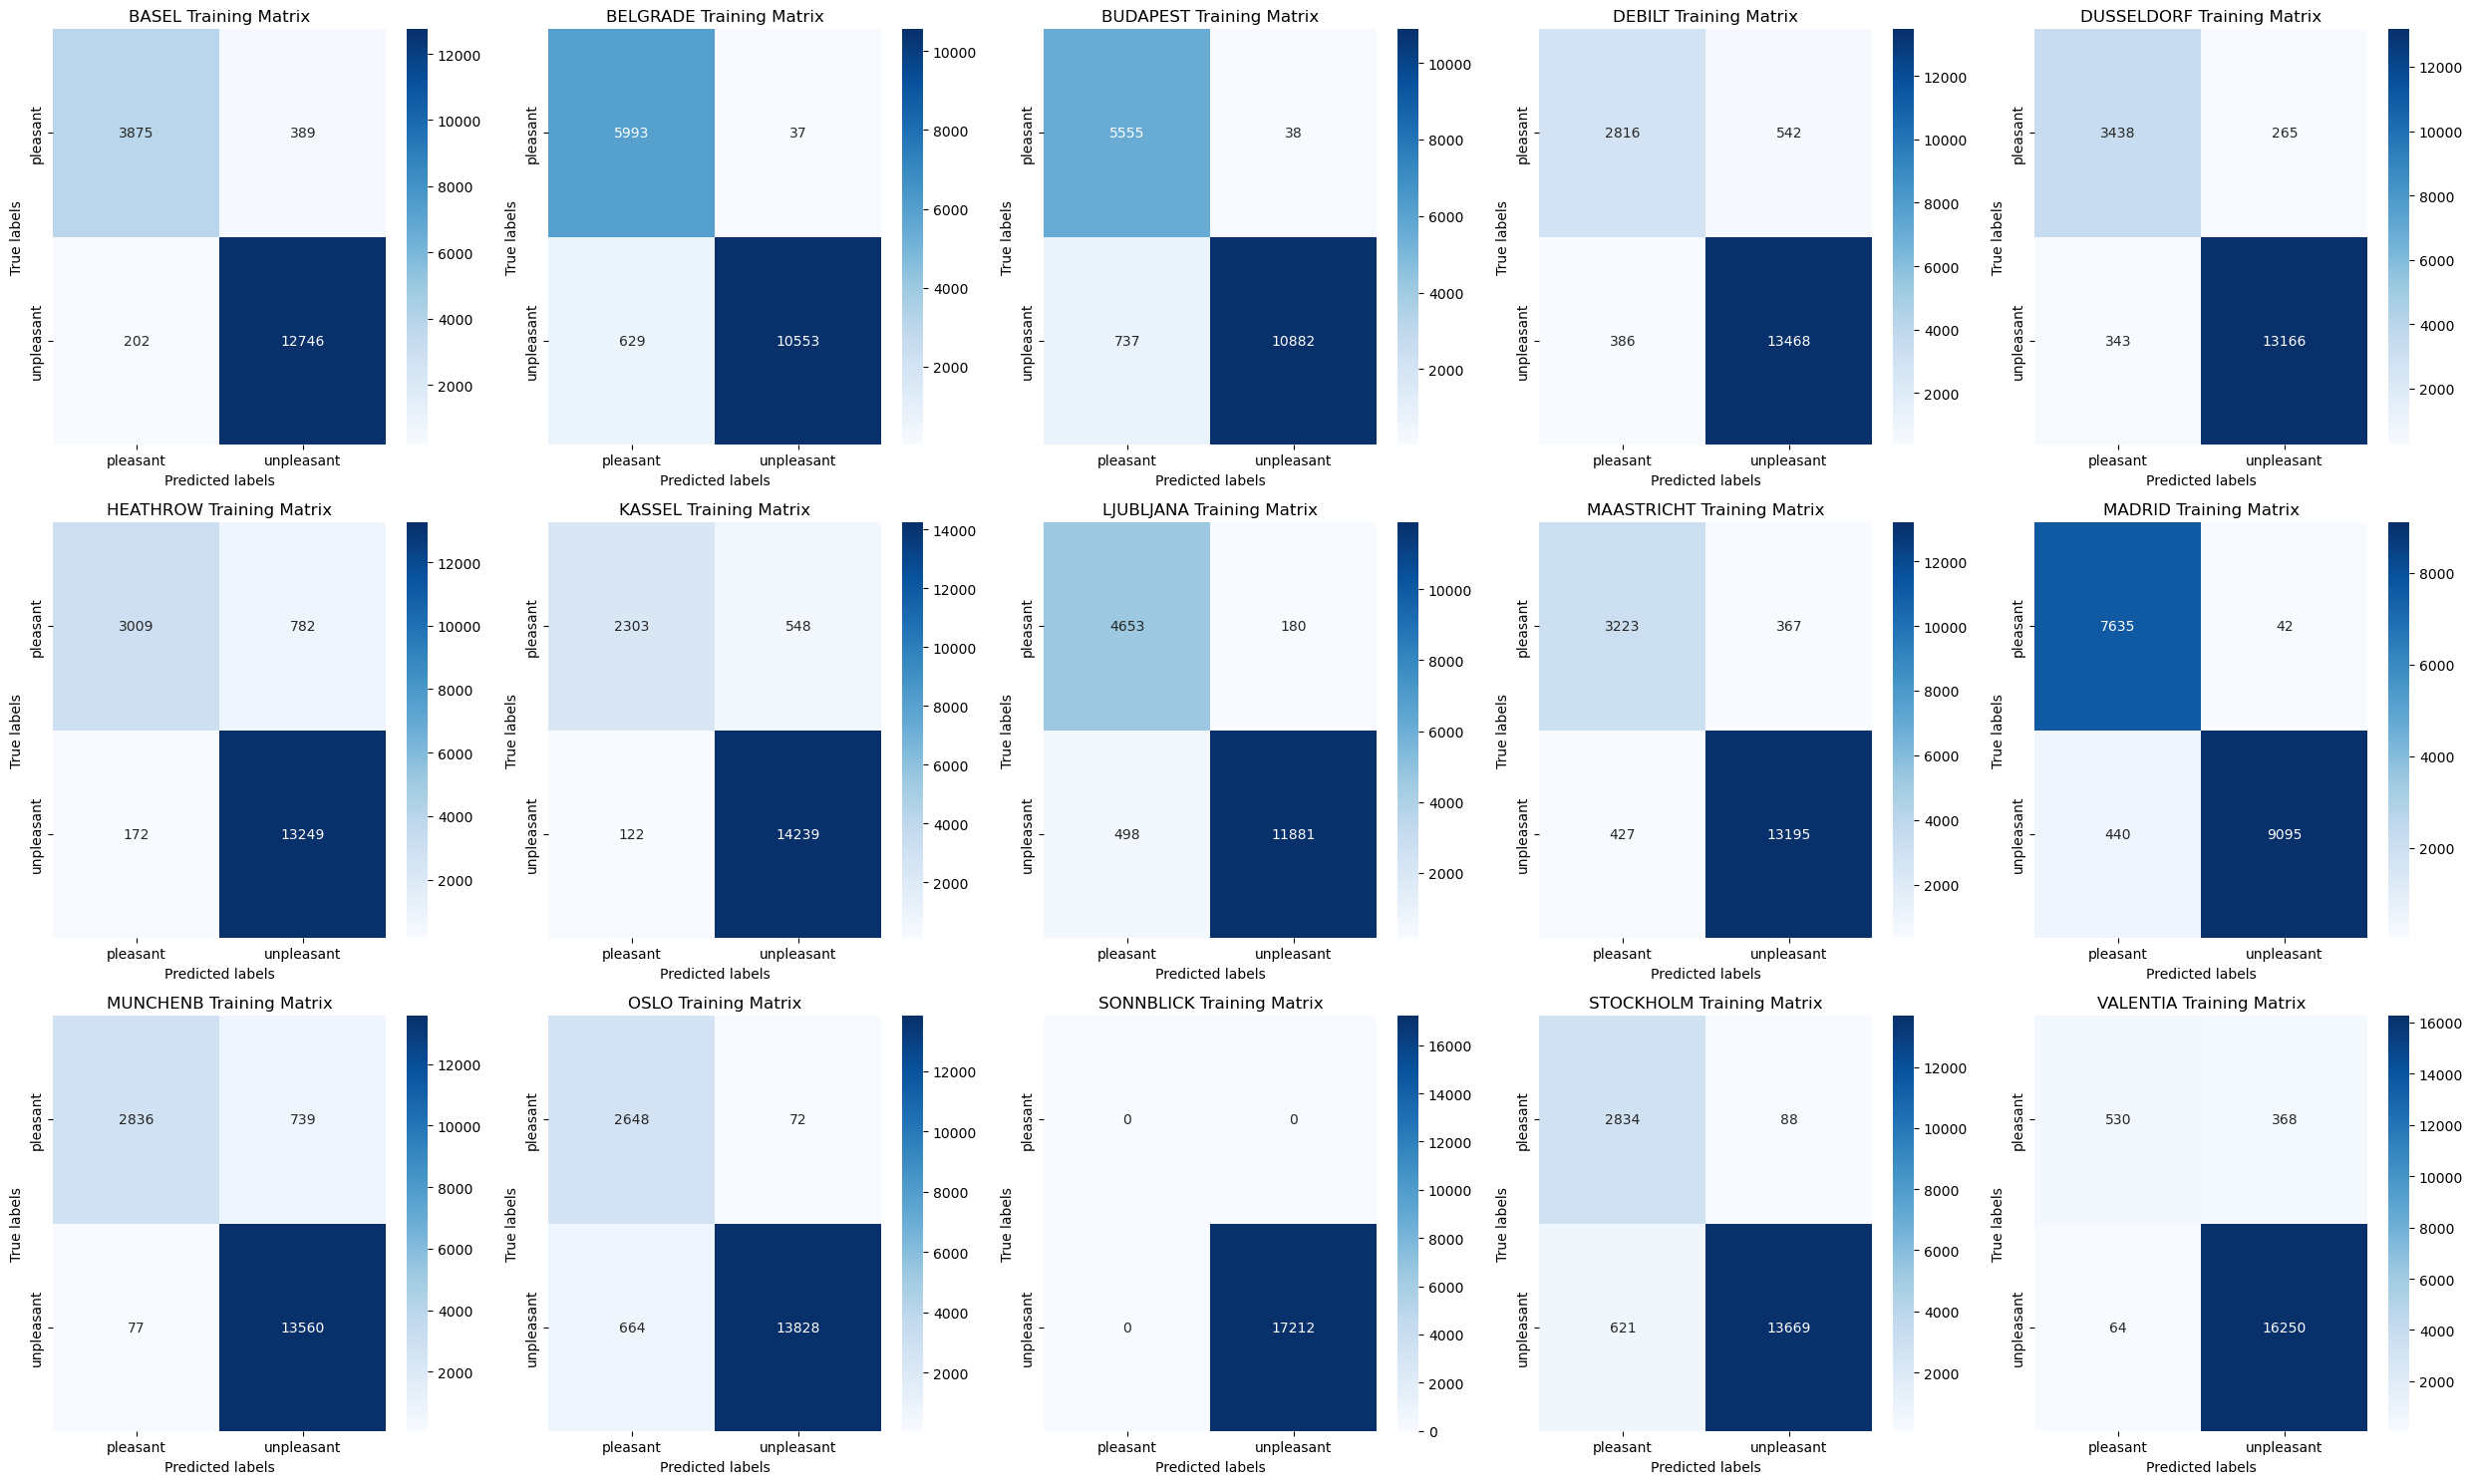

In [184]:
# Generate predictions for both training and testing sets
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot confusion matrices for training set
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_train.loc[:, name + key], y_train_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Training Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()


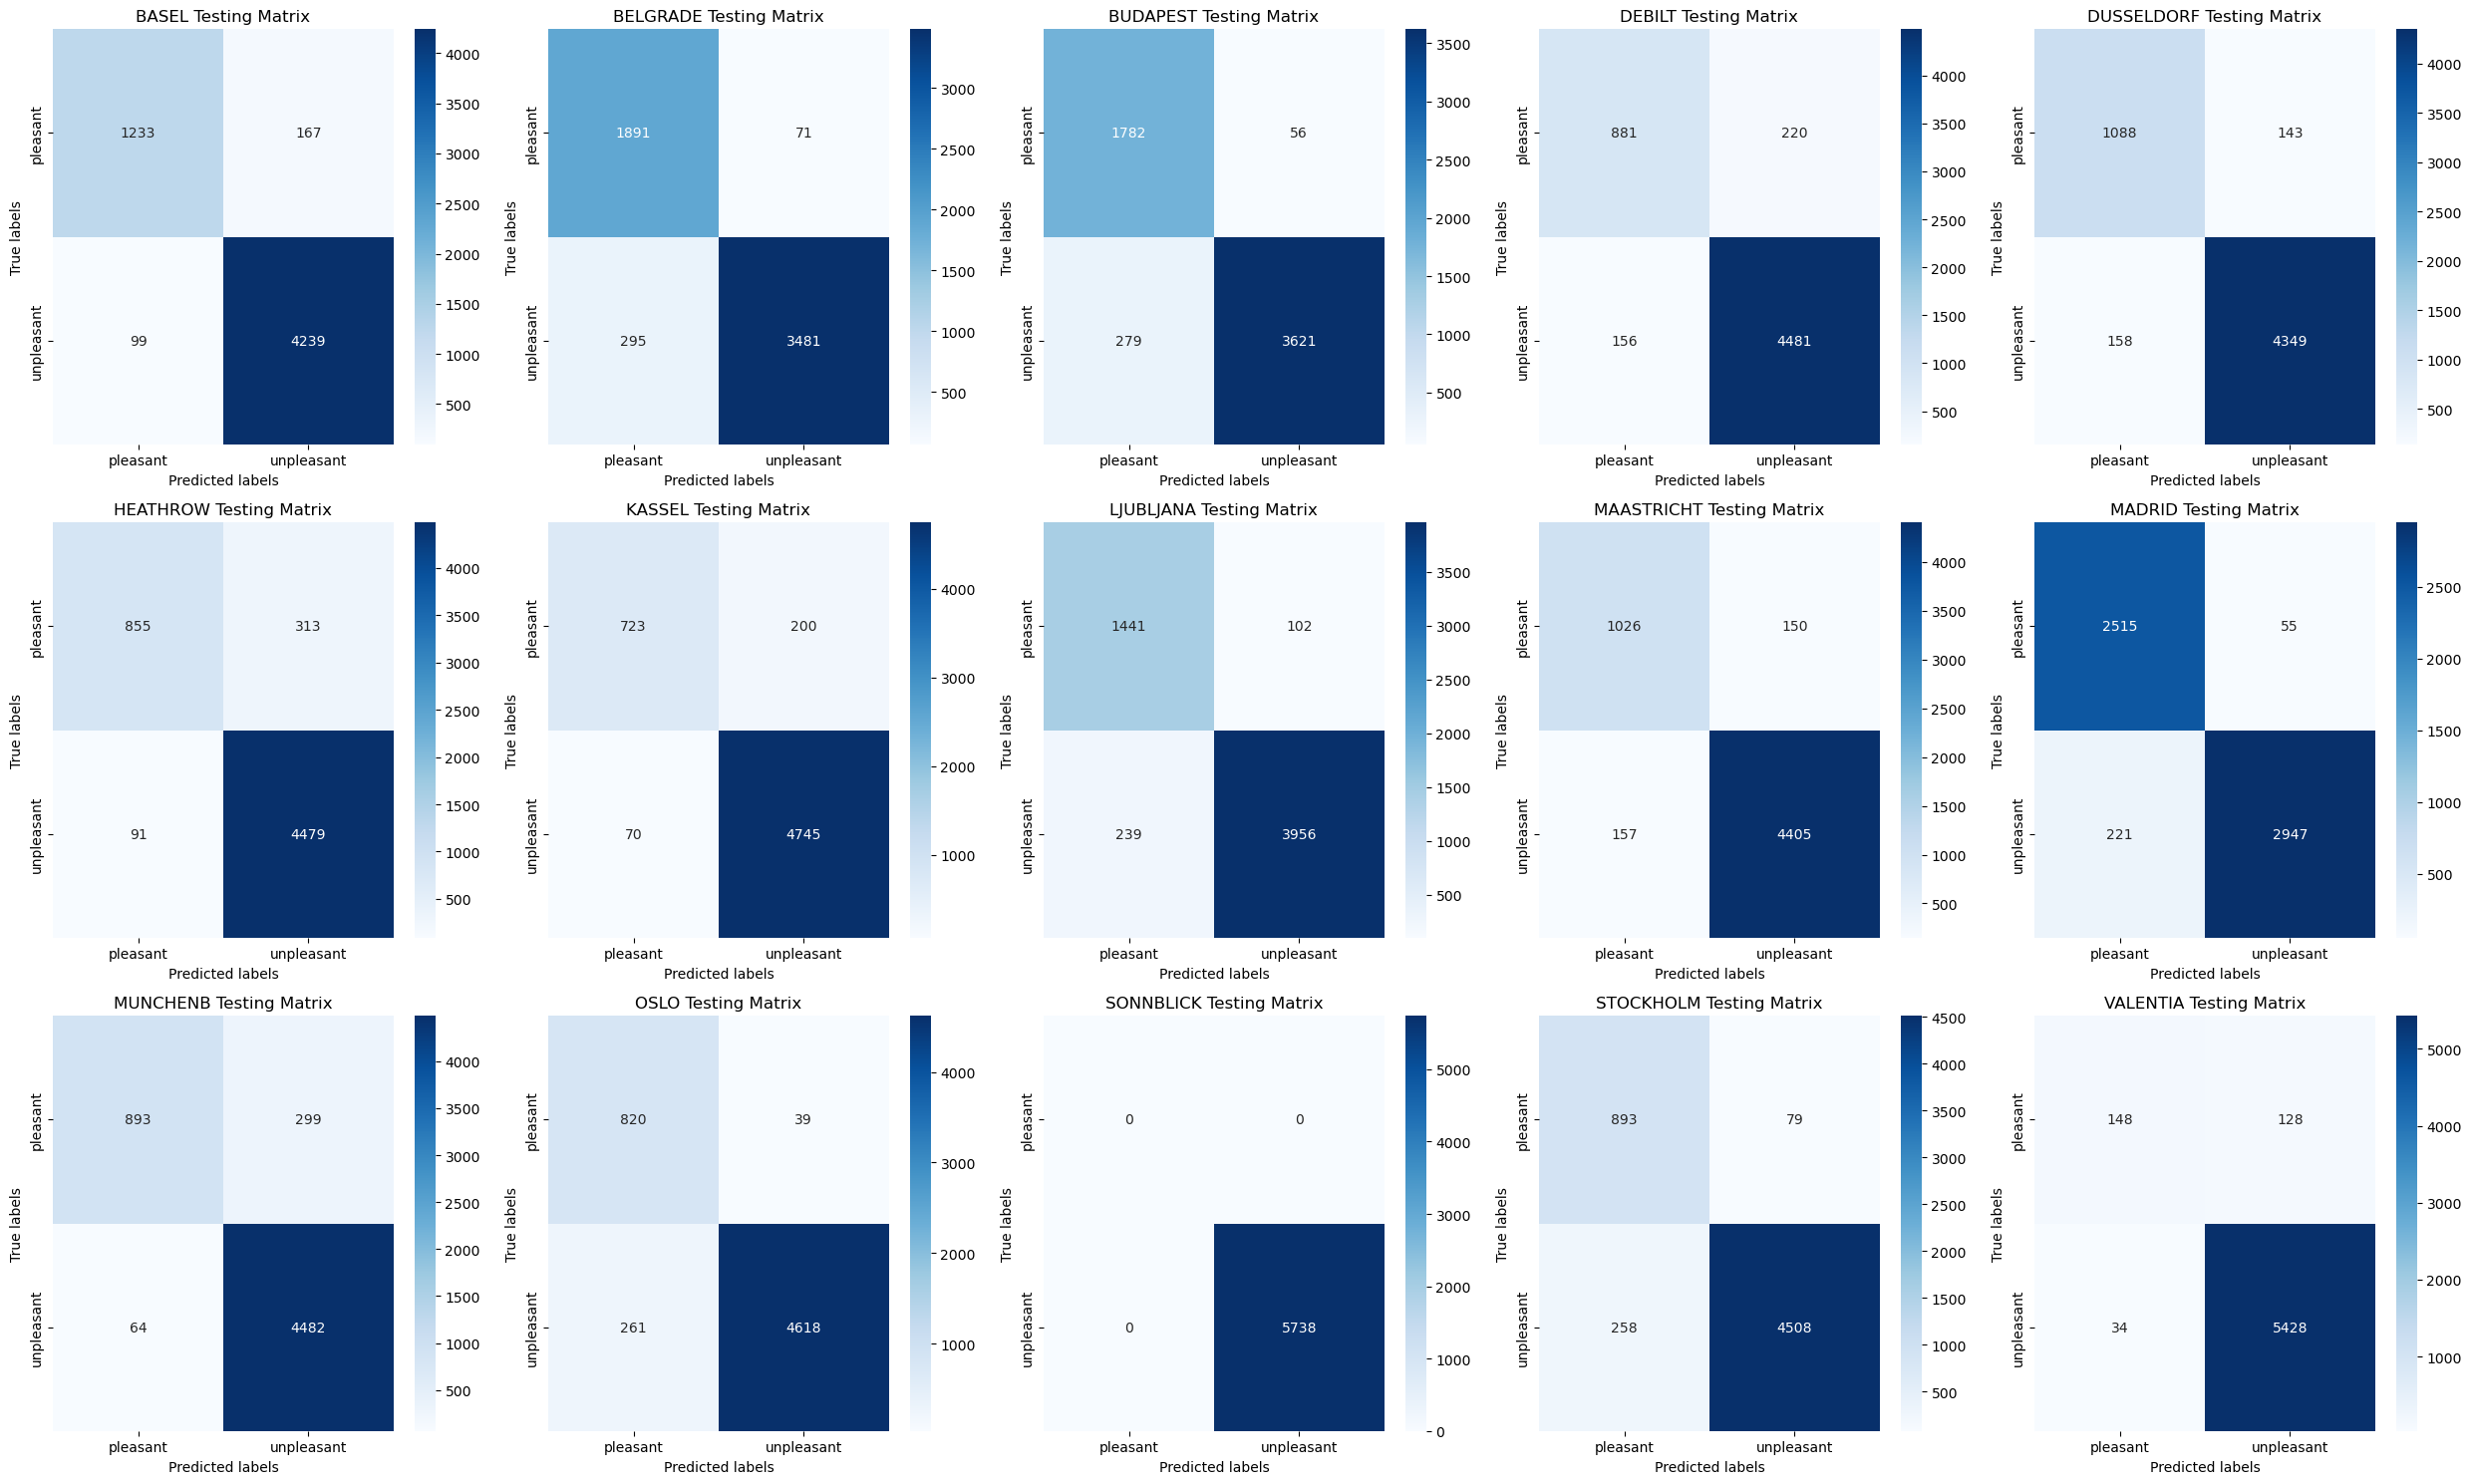

In [186]:
# Plot confusion matrices for testing set
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_test_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Testing Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()

In [180]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. Scenario 4 (1000, 50, 25) is three hidden layers with those nodes each,
#and below max_iterations and tolerance.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=600, tol=0.0005)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=600, tol=0.0005)

In [182]:
#check prediction accuracies for scenario 2

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6537299558447595
0.580167305681422


Notes:
1. It can be seen that the 4th experiment with enhanced arguments did not produce better prediction rates but rather declined figures
2. Therefore, for my case and on this data, scenario 3 is the optimal specification for the ANN classification of the dataset.